#Task 7
## Support Vector Machines (SVM)




##Objective: Use SVMs for linear and non-linear classification.



##Importing Libraries and Loading Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('breast-cancer.csv')


##Initial Data Exploration

In [3]:
# Display the first few rows of the dataset
print(df.head())



         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [4]:
# Check for missing values
print(df.isnull().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
# Get basic statistics of the dataset
print(df.describe())


                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [6]:
df.drop(columns=['id', 'Unnamed: 32'], errors='ignore', inplace=True)


##Encode labels

In [7]:
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])  # 0: Benign, 1: Malignant


##Split features and labels

In [8]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


##Standardize features

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


##Train SVM Models

In [14]:
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)

SVC(C=1)

##Evaluation

In [15]:
print("Linear Kernel SVM Classification Report:\n", classification_report(y_test, svm_linear.predict(X_test)))
print("RBF Kernel SVM Classification Report:\n", classification_report(y_test, svm_rbf.predict(X_test)))


Linear Kernel SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

RBF Kernel SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## Cross-validation

In [16]:
scores_linear = cross_val_score(svm_linear, X_scaled, y, cv=5)
scores_rbf = cross_val_score(svm_rbf, X_scaled, y, cv=5)

print("Linear SVM CV Accuracy:", scores_linear.mean())
print("RBF SVM CV Accuracy:", scores_rbf.mean())


Linear SVM CV Accuracy: 0.9701443875174661
RBF SVM CV Accuracy: 0.9736376339077782


## Hyperparameter Tuning (Grid Search)

In [17]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_scaled, y)

print("Best Parameters from Grid Search:", grid.best_params_)
print("Best Score from Grid Search:", grid.best_score_)


Best Parameters from Grid Search: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score from Grid Search: 0.9789318428815401


##Visualization (PCA to 2D)

In [20]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

svm_vis = SVC(kernel='rbf', C=1, gamma='scale')
svm_vis.fit(X_pca, y)

SVC(C=1)

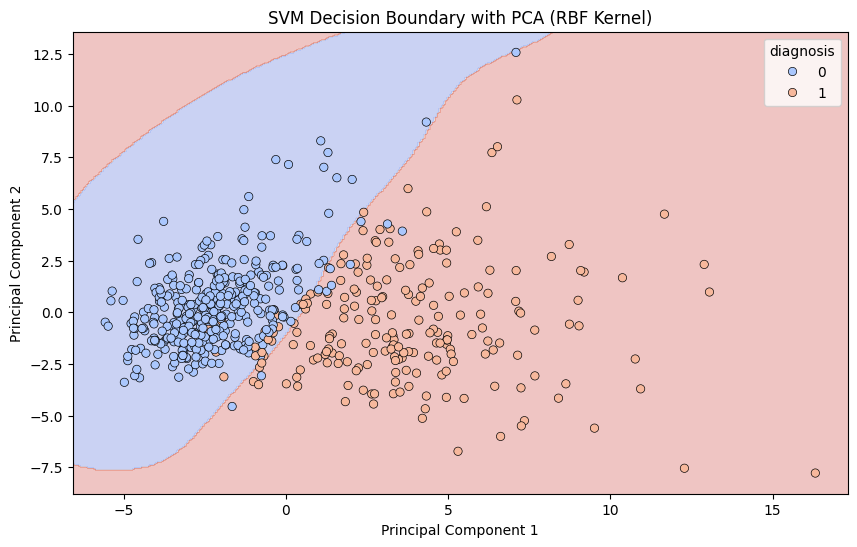

In [21]:
# Create a mesh to plot decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', edgecolor='k')
plt.title("SVM Decision Boundary with PCA (RBF Kernel)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()